In [208]:
filename = "example.jpeg"
height, width = 500, 1000

In [209]:
import cv2
import numpy as np
import math
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

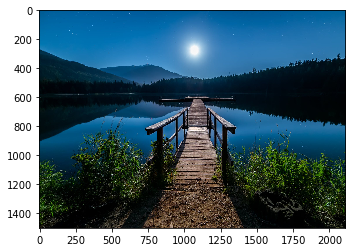

In [210]:
src = cv2.imread(filename, cv2.IMREAD_COLOR)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()

In [211]:
def Interpolation(x1, x2, d1, d2):
    return d2*x1+d1*x2

In [212]:
def BilinearInterpolation(src, dest_height, dest_width):
    src_height,src_width=src.shape[:2]
                
    dest = np.array([[[0]*3 for j in range(dest_width)] for i in range(dest_height)]).astype(np.uint8)
    for i in range(dest_height):
        for j in range(dest_width):
            x=i*(src_height-1)/(dest_height-1)
            y=j*(src_width-1)/(dest_width-1)
            
            x1=int(math.floor(x))
            x2=int(math.ceil(x))
            y1=int(math.floor(y))
            y2=int(math.ceil(y))
            
            h1=x-x1
            h2=1-h1
            w1=y-y1
            w2=1-w1

            i1 = Interpolation(src[x1][y1], src[x2][y1], h1, h2).astype(np.uint8)
            i2 = Interpolation(src[x1][y2], src[x2][y2], h1, h2).astype(np.uint8)
            dest[i][j]=Interpolation(i1, i2, w1, w2).astype(np.uint8)

    return dest


In [213]:
dest = BilinearInterpolation(src, height, width)


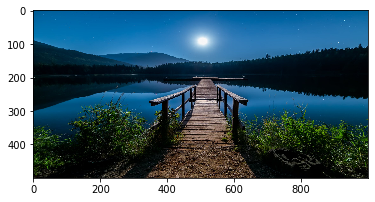

In [214]:
plt.imshow(dest)
matplotlib.image.imsave(filename.split('.')[0]+"_resized_"+str(height)+"x"+str(width)+"."+filename.split('.')[1], dest)
